In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
print(null_columns)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [4]:
# Fill null values in 'Age' with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill null values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

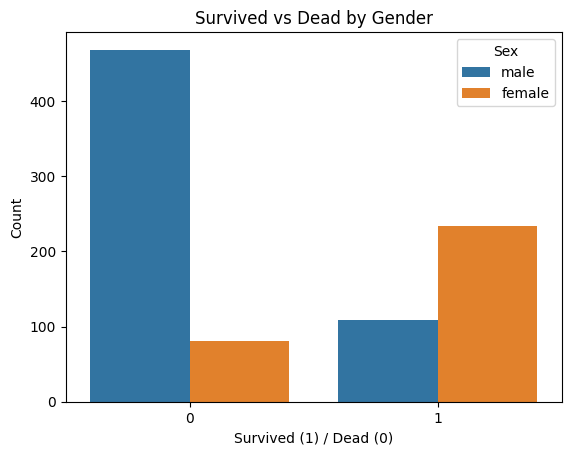

In [6]:
# Create a count plot for Survived vs Dead, with hue for Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survived vs Dead by Gender')
plt.xlabel('Survived (1) / Dead (0)')
plt.ylabel('Count')
plt.show()

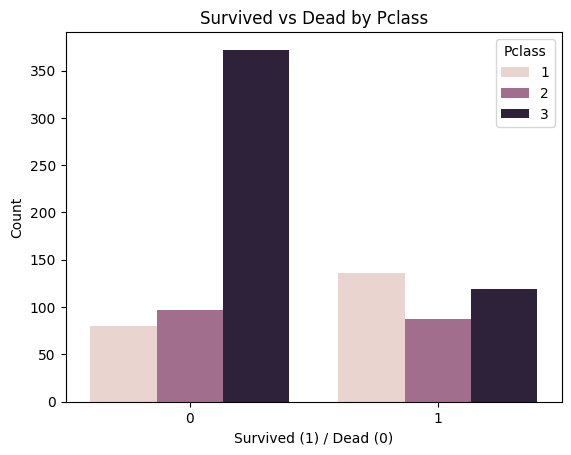

In [7]:
# Create a count plot for Survived vs Dead, with hue for Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survived vs Dead by Pclass')
plt.xlabel('Survived (1) / Dead (0)')
plt.ylabel('Count')
plt.show()

In [8]:
# Create 'AgeClass' column based on age ranges
df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, 100], labels=[0, 1, 2, 3, 4])

In [9]:
# Drop the 'Age' column
df.drop('Age', axis=1, inplace=True)

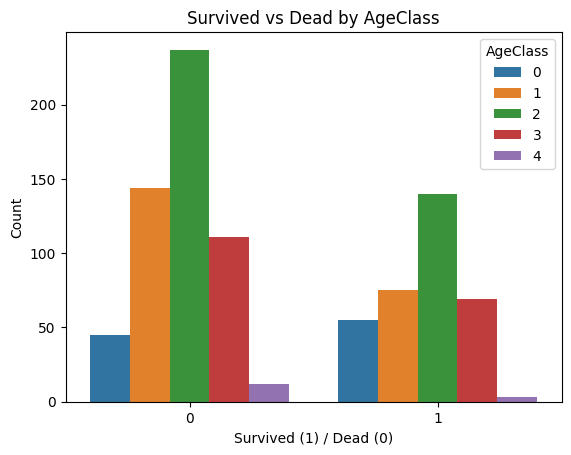

In [10]:
# Create a count plot for Survived vs Dead, with hue for AgeClass
sns.countplot(x='Survived', hue='AgeClass', data=df)
plt.title('Survived vs Dead by AgeClass')
plt.xlabel('Survived (1) / Dead (0)')
plt.ylabel('Count')
plt.show()

Since my identification number is 22 (PDS-09-22), dividing by 6 gives a remainder of 4 (since
22
÷
6
=
3
22÷6=3 with remainder
4
4). I am assigned Task 4.

**Task 4 Solution**

1.   **Create a new column** *Number of Relativ*es by summing *SibSp* and *Parch*.
2.   **Create a scatter plot** for passengers who survived (Survived = 1), with:

*   **X-axis:** Number of Relatives
*   **Y-axis:** Fare


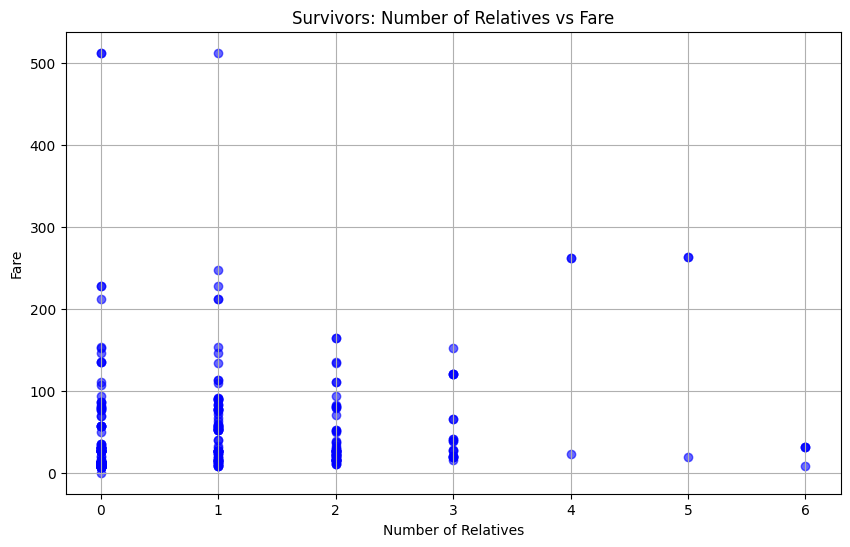

In [14]:
# Create 'Number of Relatives' column
df['Number of Relatives'] = df['SibSp'] + df['Parch']

# Filter survivors
survivors = df[df['Survived'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=survivors['Number of Relatives'],
    y=survivors['Fare'],
    color='blue',  # Single color for simplicity (no gender split required)
    alpha=0.6
)
plt.title('Survivors: Number of Relatives vs Fare')
plt.xlabel('Number of Relatives')
plt.ylabel('Fare')
plt.grid(True)
plt.show()